In [1]:
import numpy as np
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal,cdf
import matplotlib.pyplot as plt
import math

#변수 저장 
rf=0.0149
T=0.096 #Time to maturity
N=42
St=271.30

# 계산한 implied volatility 값을 저장할 빈 행렬을 Call, Put 각각 만들어준다.
sigmaC=np.zeros(shape=N+1)
sigmaP=np.zeros(shape=N+1)

# 옵션 정보 입력하기
E=np.zeros(shape=N+1)
E[0]=212.5
for i in range(1,N+1):
    E[i]=E[i-1]+2.5
Ct=[60.10, 54.10, 51.60, 48.35, 46.65, 44.15, 41.65, 39.20, 36.65, 34.15, 30.40, 32.50, 26.70, 24.25, 21.85, 20.45, 19.70, 16.30, 15.95, 13.10, 11, 9.19, 7.41, 5.81, 4.41, 3.24, 2.31, 1.56, 1.04, 0.65, 0.39, 0.23, 0.13, 0.08, 0.04, 0.02, 0.01, 0.01, 0.01,0.01, 0.01, 0.01, 0.01 ]
Pt=[0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.04, 0.05, 0.06, 0.08, 0.09, 0.12, 0.15, 0.19, 0.26, 0.34, 0.48, 0.66, 0.89,1.20, 1.62, 2.18, 2.89, 3.79, 4.90, 6.22, 8.19, 9.80, 11.55, 13.75, 20.30, 18, 25.90, 27.45, 29.80, 32.30, 33.25, 35.30, 38.25, 40.75, 43.25, 45.75, 44.80  ]


In [3]:
# Black-Scholes 방정식을 이용한 pricing 함수 정의 
def BSpricing_Call(St,E,rf,sigma,T):
    d1=(np.log(St/E)+(rf+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    
    Cbs=St*si.norm.cdf(d1,0,1)-E*np.exp(-rf*T)*si.norm.cdf(d2,0,1)
    return Cbs

def BSpricing_Put(St,E,rf,sigma,T):
    d1=(np.log(St/E)+(rf+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    
    Pbs=E*np.exp(-rf*T)*si.norm.cdf(-d2,0,1)-St*si.norm.cdf(-d1,0,1)
    return Pbs

# 옵션의 가격을 sigma로 편미분한 vega값(Call, Put이 같다.) 
def vega(St,E,rf,sigma,T):
    d1=(np.log(St/E)+(rf+0.5*sigma**2)*T)/(sigma*np.sqrt(T)) 
    
    vega=St*np.sqrt(T)*si.norm.pdf(d1,0,1)
    return vega



# implied volatility 를 계산할 numerical method인 Newton 함수 정의 
def newton(f,Df,x0,e,Max):
    xn=x0
    for n in range(0,Max):
        fxn=f(xn)
        if abs(fxn)<e:
            print("implied volatility of call option at strike price ",E[i],": ",xn)
            return xn
        Dfxn=Df(xn)
        if Dfxn==0:
            print("failed to find implied volatility of call option at strike price",E[i],".")
            return None
        xn=xn-fxn/Dfxn
    return None

# a. (1) Implied volatility of Call option

In [4]:
# 콜옵션에 대한 newton method 실행하여 implied volatility 계산 후 값 출력 
for i in range(N+1):
    f=lambda x: BSpricing_Call(St,E[i],rf,x,T)-Ct[i]
    Df=lambda x:vega(St,E[i],rf,x,T)
    
    sigmaC[i]=newton(f,Df,1,1e-10,1000)

implied volatility of call option at strike price  212.5 :  0.5121847282379548
failed to find implied volatility of call option at strike price 215.0 .
failed to find implied volatility of call option at strike price 217.5 .
failed to find implied volatility of call option at strike price 220.0 .
failed to find implied volatility of call option at strike price 222.5 .
failed to find implied volatility of call option at strike price 225.0 .
failed to find implied volatility of call option at strike price 227.5 .
failed to find implied volatility of call option at strike price 230.0 .
failed to find implied volatility of call option at strike price 232.5 .
failed to find implied volatility of call option at strike price 235.0 .
failed to find implied volatility of call option at strike price 237.5 .
implied volatility of call option at strike price  240.0 :  0.2883581832413557
failed to find implied volatility of call option at strike price 242.5 .
failed to find implied volatility of ca

C:\Users\hoyah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hoyah\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars


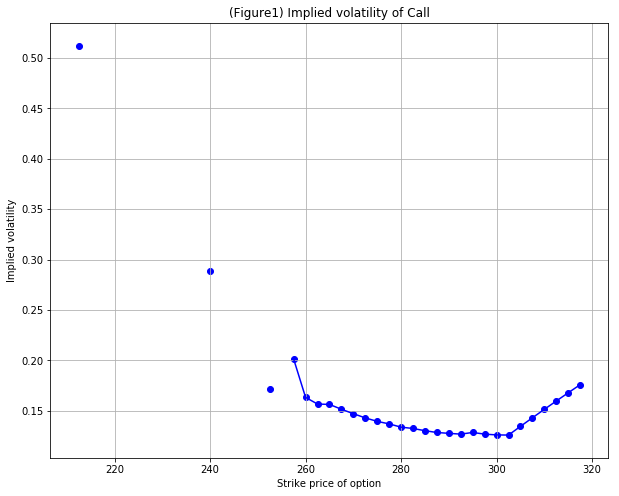

In [5]:
# 그래프 그리기
plt.figure(figsize=(10,8))

plt.plot(E,sigmaC,color="b")
plt.scatter(E,sigmaC,color="b")
plt.xlabel('Strike price of option')
plt.ylabel('Implied volatility')
plt.grid(True)
plt.axis('tight')
plt.title('(Figure1) Implied volatility of Call')
plt.show()

# a. (2) Implied volatility of Put option

In [6]:
# 풋옵션에 대한 newton method 실행하여 implied volatility 계산 후 값 출력 
for i in range(N+1):
    f=lambda x: BSpricing_Put(St,E[i],rf,x,T)-Pt[i]
    Df=lambda x:vega(St,E[i],rf,x,T)
    
    sigmaP[i]=newton(f,Df,1,1e-10,1000)

implied volatility of call option at strike price  212.5 :  0.28945573352740267
implied volatility of call option at strike price  215.0 :  0.2768588223918594
implied volatility of call option at strike price  217.5 :  0.2643691665758208
implied volatility of call option at strike price  220.0 :  0.2519817741822856
implied volatility of call option at strike price  222.5 :  0.25019288444990334
implied volatility of call option at strike price  225.0 :  0.23754605409317928
implied volatility of call option at strike price  227.5 :  0.23248703452140035
implied volatility of call option at strike price  230.0 :  0.22564496305759627
implied volatility of call option at strike price  232.5 :  0.21756390151051988
implied volatility of call option at strike price  235.0 :  0.21236116192169863
implied volatility of call option at strike price  237.5 :  0.2021229126188473
implied volatility of call option at strike price  240.0 :  0.19668260249717778
implied volatility of call option at strike 

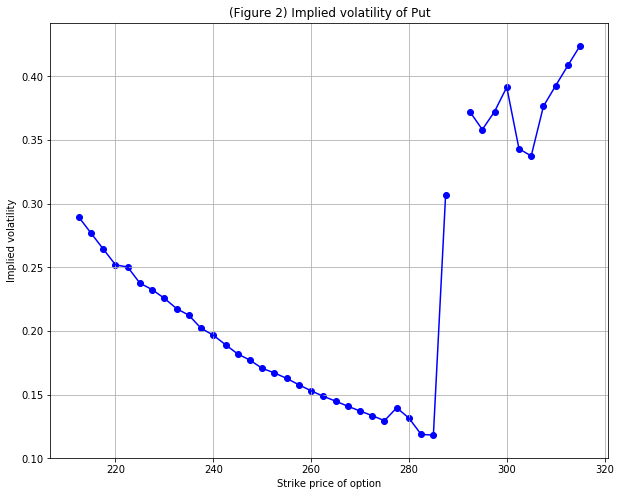

In [7]:
plt.figure(figsize=(10,8))

plt.plot(E,sigmaP,color="b")
plt.scatter(E,sigmaP,color="b")
plt.xlabel('Strike price of option')
plt.ylabel('Implied volatility')
plt.grid(True)
plt.axis('tight')
plt.title('(Figure 2) Implied volatility of Put')
plt.show()

# (b)

  Implied volatility(이하 iv)는 현재 시장가격으로부터 구한 옵션의 변동성으로 가격에 대한 시장의 예측을 반영하고 있다. 먼저, 변동성은 옵션의 가격과 양의 상관관계를 가지므로 기초자산의 가격(St)이 일정할 때 iv가 낮은 옵션은 iv가 높은 옵션보다 가격이 낮아야 한다. 따라서, iv가 낮을수록 옵션가가 저평가 되어있고, 높을수록 고평가 되어있다고 할 수 있다. 
  
  
위 두 그림을 비교해보면 콜옵션의 iv는 행사가격이 낮을 때 높고, 풋옵션의 iv는 행사가격이 높을 때 비교적 높은 양상을 보인다. 따라서, 주가가 하락할수록 이득을 취하는 포지션의 옵션가격이 높게 형성되어 있으므로, 그래프는 하락장이 될 것이라는 예측을 반영하고 있다.


따라서, 행사가격 k1<k2일 때, k1인 풋옵션을 1개 매도하고 k2인 풋옵션을 1개 매수하는(or k1 콜 1개 매도+k2 콜 1개 매수) Bear Spread position을 구축하면 하락장으로부터 이득을 취할 수 있다. (ex) -P(k=222.5)+Put(k=245))